# Validation of AUS2200 column maximum radar reflectivities

Notebook by Tim Raupach - <t.raupach@unsw.edu.au>

## Setup

In [1]:
%cd git/AUS2200_CLEX_analysis/evaluation/radar/

/home/561/tr2908/git/AUS2200_CLEX_analysis/evaluation/radar


In [141]:
import xarray
import numpy as np
import pandas as pd
import radar_val as rv
import cartopy.crs as ccrs
import scipy.stats as stats
from importlib import reload
import matplotlib.pyplot as plt
from dask.distributed import Client

Start up a local dask cluster.

In [3]:
client = Client()

All associated code for this work is in the file `radar_val.py`. Regridding weights generated by `xemsf` are cached in `regrid_weights`.

## Functions for data access

Radar data are stored per radar site and need to be reprojected onto the Aus2200 grid. The function `sim_for_time` gets Aus2200 data for a given time. By default it gets column maximum radar reflectivity. For example:

In [159]:
t = '2022-02-22 10:00'
sim = rv.sim_for_time(t=t)
display(sim)

<xarray.Dataset>
Dimensions:  (lat: 2120, lon: 2600)
Coordinates:
  * lat      (lat) float64 -48.79 -48.77 -48.75 -48.73 ... -6.871 -6.852 -6.832
  * lon      (lon) float64 107.5 107.5 107.6 107.6 ... 158.9 158.9 159.0 159.0
    time     datetime64[ns] 2022-02-22T10:00:00
Data variables:
    sim      (lat, lon) float32 ...

The function `rad_for_time` returns an xarray object with all the radar data from all sites collected for a given time, regridded onto the common grid. We use the grid of the `sim` object:

In [160]:
grid = sim[['lat', 'lon']]
rad = rv.rad_for_time(t=t, grid=grid)
display(rad)

<xarray.Dataset>
Dimensions:  (lat: 2120, lon: 2600)
Coordinates:
    time     datetime64[ns] 2022-02-22T10:00:00
  * lat      (lat) float64 -48.79 -48.77 -48.75 -48.73 ... -6.871 -6.852 -6.832
  * lon      (lon) float64 107.5 107.5 107.6 107.6 ... 158.9 158.9 159.0 159.0
Data variables:
    radar    (lat, lon) float32 dask.array<chunksize=(2120, 2600), meta=np.ndarray>
    mask     (lat, lon) bool False False False False ... False False False False

## Visual comparisons

The function `compare_time` gets and plots radar and simulated fields of column-maximum reflectivity for any given time:

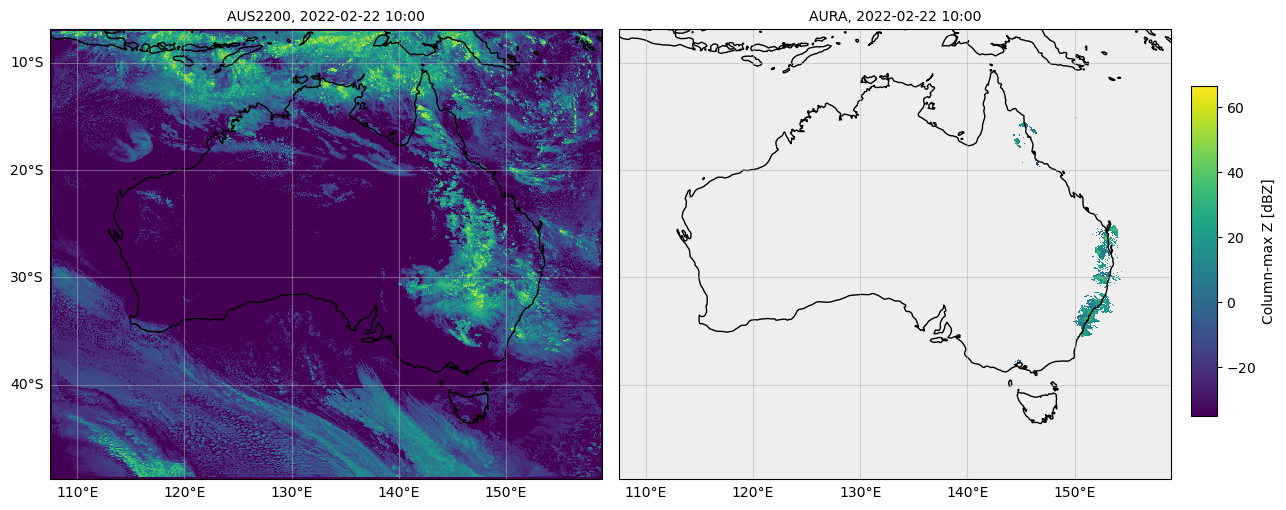

In [129]:
rv.compare_time(t='2022-02-22 10:00', mask_to_radars=False)

By specifying `mask_to_radars = True` the plots will be masked to only radar areas for easier comparison. Note that in the the radar data, the `isfile` field shows whether a radar volume was recorded at a given time; if `isfile == True` a volume was recorded and `nan` values in that volume areas measured by the radar where no signal was returned. Since the radar data do not distinguish between points where no signal was returned and points where no signal was ever returned, I have used the 150 km radius for the radars as the mask around each centre point.

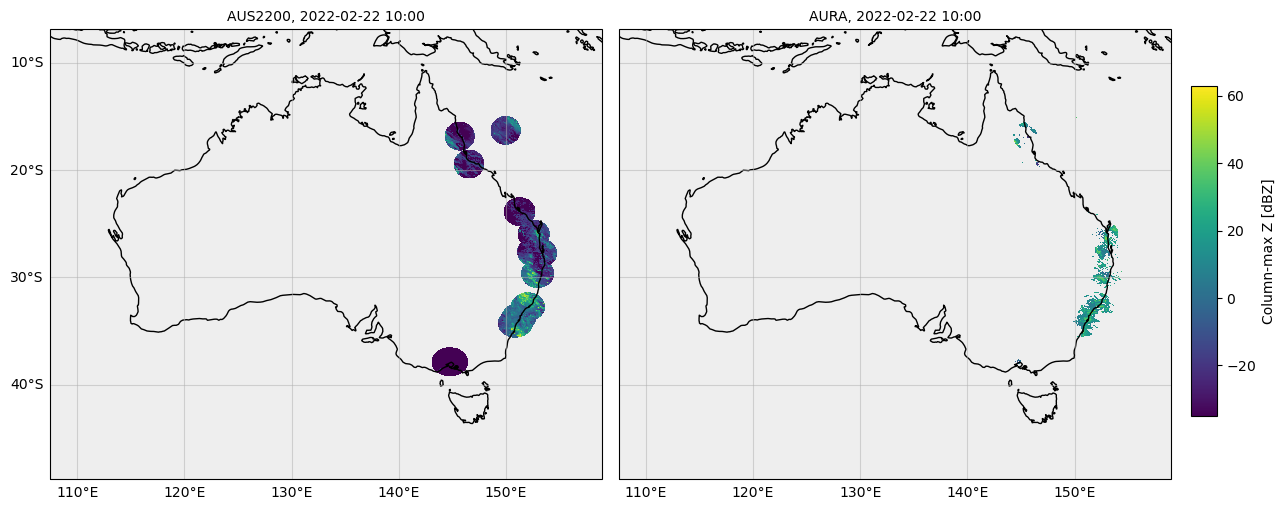

In [162]:
rv.compare_time(t='2022-02-22 10:00', mask_to_radars=True)